# Modifying an image

## Introduction

JPEG images are comprised of three dimensional arrays of the shape M x N x 3 with the final dimension comprised of RGB values. By playing with the RGB values we can change the colors of the image.

This can be used to adjust and edit image qualities via python using arrays and tool libraries like pandas and numpy. It is also helpful for data gathering from an image dataset and for machine learning technics that use image datasets.

In [1]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio as io
from PIL import Image
import skimage.io
import cv2
from scipy import misc

We open our image leaves.jpg

In [2]:
import imageio as io
from PIL import Image
import skimage.io #this is changed from skimage to skimage.io from Windows 10 onward
import cv2

img_path = str(r'C:\Users\pizza\Desktop\projects\uploaded\leaves\leaves.jpg')
img_ref = io.imread(img_path)

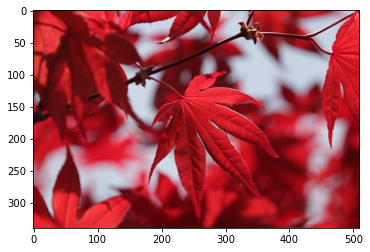

In [3]:
img = io.imread(img_path)
plt.imshow(img)

Accessing the distribution of pixels on our image

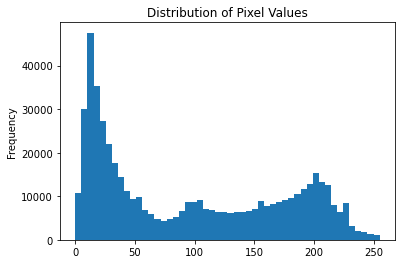

In [4]:
pd.Series(img.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

## Converting image to grayscale

Since each color pixel is described by a triple (R, G, B) of intensities for red, green, and blue, mapping it to a single number to give a grayscale value can be performed by different algorithsm.

### Average method

M = (R+G+B) / 3

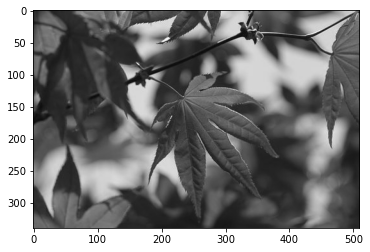

In [5]:
img_avg = io.imread(img_path)
x,y,z = img_avg.shape
img_avg[:] = img_avg.mean(axis=-1,keepdims=1) 
plt.imshow(img_avg)

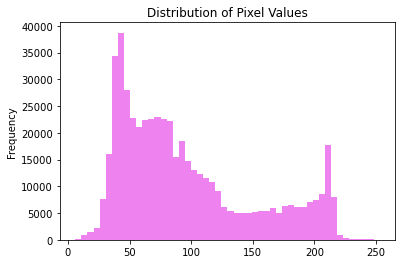

In [6]:

pd.Series(img_avg.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values',
                                  color = 'violet')
plt.show()

### Luminosity method

M = 0.21 R + 0.72 G + 0.07 B

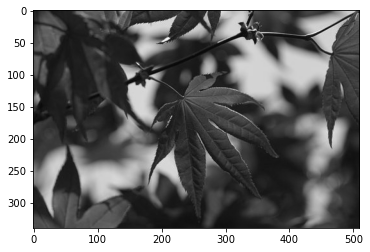

In [7]:
img_lum = io.imread(img_path)
W = [0.21,0.72,0.07] # weights
W_mean = np.tensordot(img_lum,W, axes=((-1,-1)))[...,None]
img_lum[:] = W_mean.astype(img.dtype)
plt.imshow(img_lum)

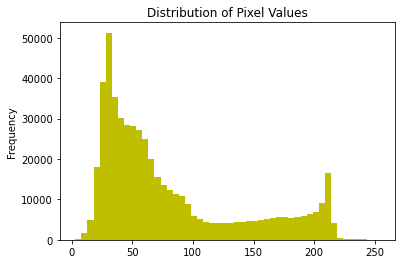

In [8]:
pd.Series(img_lum.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values', color='y')
plt.show()

### Lightness method

M = (max(R, G, B) + min(R, G, B)) / 2.

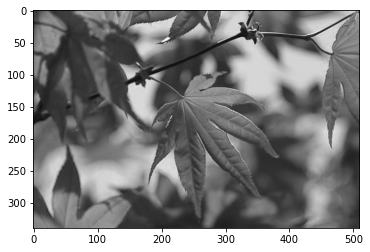

In [9]:
img_light=io.imread(img_path)
img_light[:] = np.max(img_light,axis=-1,keepdims=1)/2+np.min(img_light,axis=-1,keepdims=1)/2
plt.imshow(img_light)

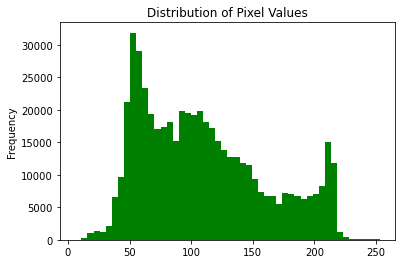

In [10]:
pd.Series(img_light.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values', color='green')
plt.show()

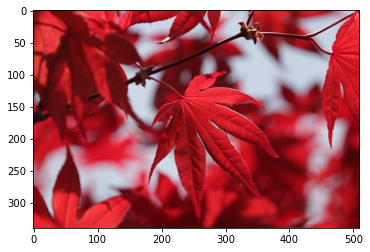

In [11]:
img = io.imread(img_path)
plt.imshow(img)

### Comparison of the three algorithms

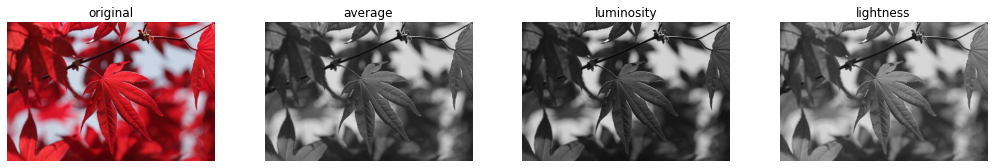

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
ax1.axis("off"); ax2.axis("off"); ax3.axis("off");ax3.axis("off");ax4.axis("off")
ax1.imshow(img_ref);ax2.imshow(img_avg); ax3.imshow(img_lum); ax4.imshow(img_light)
fig.tight_layout(pad=5.0)
ax1.title.set_text("original"); ax2.title.set_text("average"); ax3.title.set_text("luminosity"); ax4.title.set_text("lightness")

## Measuring the PSNR

Peak signal-to-noise ratio (PSNR) is an engineering term for the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. Because many signals have a very wide dynamic range, PSNR is usually expressed as a logarithmic quantity using the decibel scale.

PSNR is commonly used to quantify reconstruction quality for images and video subject to lossy compression. 
PSNR is most easily defined via the mean squared error (MSE). 

![image.png](eq.png)

MAX is the maximum possible pixel value of the image. Since the pixels are represented using 8 bits per sample, this value is 255. More generally, when samples are represented using linear PCM with B bits per sample.

![image.png](eq2.png)

We define the function psnr with 2 input images to compare

In [13]:
def psnr(img1, img2):
    
    mse = np.mean((img1 - img2) ** 2)
    
    if mse == 0:
        return "MSE is zero, which means the images are identic"
    
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

## Final comparison of the grayscale methods and their PSNR

In [14]:
print(psnr(img_ref, img_avg))
print(psnr(img_ref, img_lum))
print(psnr(img_ref, img_light))

print(psnr(img_ref, img_ref))

27.794065979554524
28.13155137419985
27.608773636465948
MSE is zero, which means the images are identic
